# Name : Prateek Dhole

# Task 5 : Sales Prediction using python

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 5)

In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


# Data Visualization

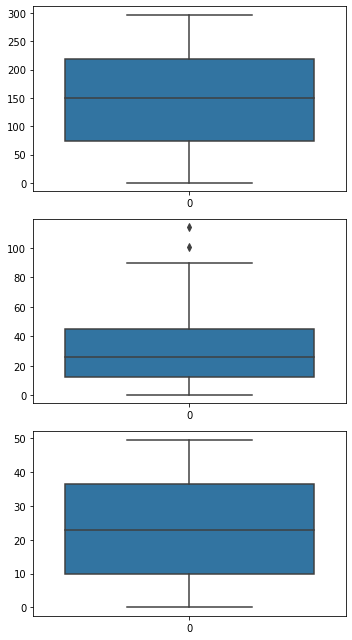

In [13]:
fig, axs=plt.subplots(3,figsize=(5,9))
plt1 = sns.boxplot(df['TV'], ax=axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax=axs[1])
plt3 = sns.boxplot(df['Radio'], ax=axs[2])
plt.tight_layout()

<ipython-input-16-6fe4fcc6000a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'])


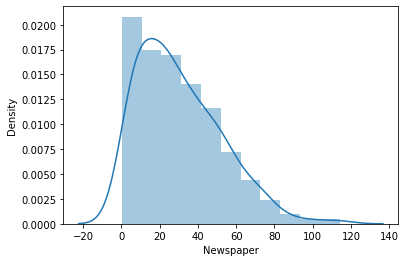

In [16]:
sns.distplot(df['Newspaper'])

In [17]:
iqr= df.Newspaper.quantile(0.75)- df.Newspaper.quantile(0.25)
lower_bridge=df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge=df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [18]:
data =df.copy()

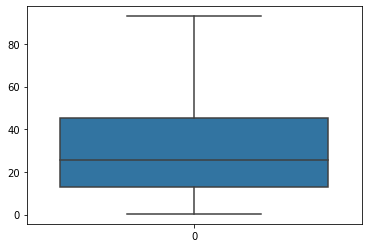

In [19]:
data.loc[data["Newspaper"]>=93, "Newspaper"]=93
sns.boxplot(data["Newspaper"])

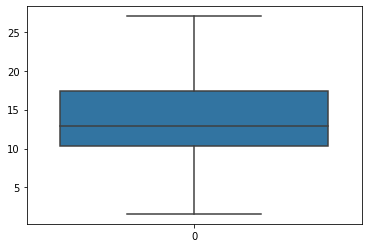

In [20]:
sns.boxplot(data["Sales"]);

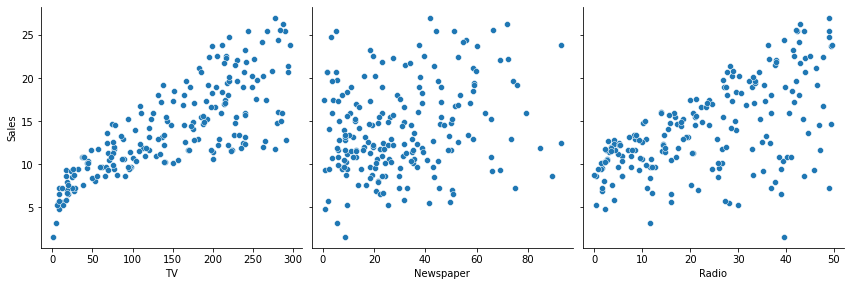

In [21]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars="Sales", height=4, aspect=1, kind="scatter")
plt.show()

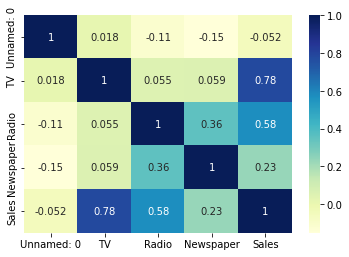

In [22]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [23]:
important_features= list(df.corr()["Sales"][(df.corr()["Sales"]>+0.5)|(df.corr()["Sales"]<-0.5)].index)
print(important_features)

['TV', 'Radio', 'Sales']


# Training and Testing data

In [24]:
x=data['TV']
y=data['Sales']
X=x.values.reshape(-1,1)

In [26]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [27]:
print(X.shape,y.shape)

(200, 1) (200,)


# Model Training

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [29]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [30]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)
print(knn_train_pred, knn_test_pred)

[13.1   6.56 11.98 18.92 15.6  11.1  12.86 13.1  17.3  13.66 15.88 15.6
  7.26 20.82 17.44 16.16 19.24 17.04 18.32 20.8  11.98 15.54  7.26 18.92
 16.06 17.54 15.06 11.98 16.66  6.56 11.1  13.28 13.46 16.06  9.98 12.56
 16.06  6.84 11.82 20.22 18.74 16.06  5.96 14.34 17.3   9.66 13.28 12.64
 13.26  6.84 17.76 17.74 14.9  18.56 13.82 10.32 15.6  13.1   5.96 17.3
 20.8  10.76  7.26  7.74 12.44 11.82 15.54  9.72 16.02 15.98  5.96 11.82
  7.74 12.72 12.44 18.34 17.54  9.72 15.1  15.06 12.44 11.56 11.98  9.96
 19.24 10.76  9.98 11.1  17.76  5.26 21.12 15.48 12.86  9.96  7.74 12.72
 16.06 15.06 17.3  16.38 13.28 17.28 11.04 10.76 16.16 15.06 18.32 13.26
 16.52 16.52 20.82 16.02 11.98 16.02  9.2   5.96  6.04 20.82 20.04  5.26
  7.74 10.76 20.82  5.96 18.56 17.54  9.98 13.64 15.6  15.4  14.42 16.66
 15.06  6.84] [ 5.26 13.28 13.64  6.84 15.6  11.56 14.5  13.1  18.92 14.9  16.16  7.74
  7.26  9.96 11.64 17.44 18.22  9.2  15.4  11.98 12.14 17.3  11.82 15.02
  9.66 15.02 11.02 18.32 18.92 10.76  7

In [31]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.46649768674359415
RMSE: 3.819934157769865


In [32]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.680803,0.466498,3.819934,0.214305


In [33]:
import statsmodels.api as sm
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant).fit()
model.params

const    6.915527
x1       0.046285
dtype: float64

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     213.7
Date:                Sat, 06 May 2023   Prob (F-statistic):           2.23e-29
Time:                        18:04:15   Log-Likelihood:                -345.99
No. Observations:                 134   AIC:                             696.0
Df Residuals:                     132   BIC:                             701.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9155      0.547     12.631      0.0

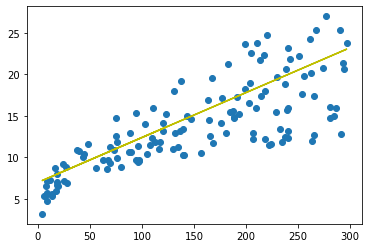

In [35]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [36]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

123    2.586799
108   -2.221859
140    0.587160
20     0.975846
103   -0.912464
         ...   
112   -0.947788
124    2.162083
185    6.196064
173   -3.009908
189   -1.081055
Name: Sales, Length: 134, dtype: float64

In [37]:
y_train_pred

array([12.61320077,  7.52185921, 10.31284008, 17.02415395, 15.6124638 ,
       11.27556649, 11.88652747, 12.47897449, 19.08383304, 12.90479579,
       17.6582574 , 15.6078353 ,  7.7116274 , 20.50478018, 20.0743304 ,
       15.10795813, 20.37055391, 20.15301477, 16.85289974, 18.66264024,
       10.45169485, 15.76057555,  7.69774192, 17.02878245, 18.02853679,
       19.26897273, 14.58031001, 10.39152445, 16.36227955,  7.5264877 ,
       11.26168101, 13.36301653, 13.21953326, 18.0192798 , 11.42830673,
       12.03926772, 17.99150885,  7.78568327, 10.95157202, 16.79735783,
       19.73182197, 18.02853679,  7.25340666, 17.48237469, 16.61684663,
        9.5167394 , 13.37227351, 12.14109455, 13.01125111,  7.81345423,
       19.88456221, 17.11209531, 13.13159191, 16.13085494, 14.1637457 ,
        9.15108851, 15.63560626, 12.49285997,  7.31357706, 19.07457605,
       18.73669612,  8.74378118,  7.74402684,  8.0726498 , 12.28457781,
       11.00248544, 15.85777389,  9.97496014, 17.9035675 , 15.36

<ipython-input-38-66f56fd38cf4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


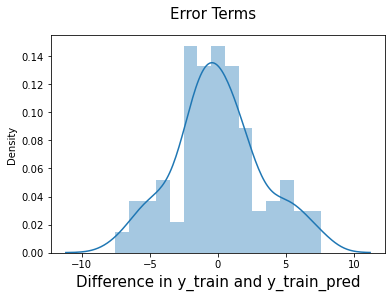

In [38]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

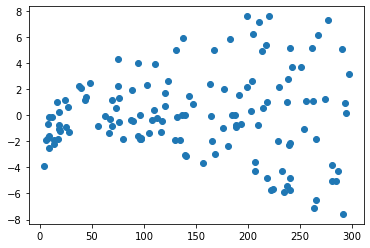

In [39]:
plt.scatter(X_train, res)
plt.show()

In [40]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
y_pred

array([ 6.94792616, 13.35838803, 13.45558637,  7.82271121, 17.12135229,
       10.53500771, 14.79322065, 12.51600243, 18.41270165, 13.17324834,
       15.10795813,  8.23927552,  7.7116274 , 10.08141547, 10.88214464,
       20.04193095, 16.06142755,  9.67410814, 15.02001678, 10.44706636,
       13.84437973, 16.66776005, 11.09968378, 14.84413407,  9.5769098 ,
       14.89967598, 11.56253301, 16.93158411, 18.43121562,  8.98446279,
        8.10042075, 17.36666239,  8.3735018 , 10.45169485, 12.73354157,
       15.88091635, 16.16325438, 16.06142755, 17.56568756, 19.94010412,
       16.16325438, 10.40078144, 13.92769259, 15.47360903, 17.43146128,
       10.05364451, 11.99761129, 16.79272934, 19.72256498, 15.95960072,
        8.90577842, 17.46848922, 17.08895285,  8.62344038,  8.07727829,
        9.22977288, 18.17202005, 16.88529919,  8.68361078, 14.48311167,
       20.22707064, 16.99175451, 17.20929365,  9.39177011, 10.1832423 ,
       13.84900822])

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

3.3733448444693543

In [42]:
r2 = r2_score(y_test, y_pred)
r2

0.5839495157284906

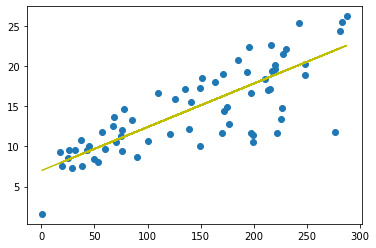

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()